In [4]:
# import the time module
import datetime
import time

from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

In [5]:
#assigned unix time (we would do this to a column)
unix_time = 1627334400
date_time = datetime.datetime.fromtimestamp(unix_time) #uses unix_time in the function and assigns to date_time
#print unix time stamp
print("unix_Time =>", unix_time)

unix_Time => 1627334400


In [6]:
# displaying date and time in a regular
# string format
print("Date & Time =>",
      date_time.strftime('%Y-%m-%d %H:%M:%S'))

Date & Time => 2021-07-26 16:20:00


In [7]:
print(date_time) # Can just do it this way too

2021-07-26 16:20:00


In [8]:
fromdate = datetime.date(2017, 4, 29)
unix_fromdate = str(int(time.mktime(fromdate.timetuple())))
print(unix_fromdate)

1493442000


In [9]:
todate = datetime.date(2021, 4, 29)
unix_todate = str(int(time.mktime(todate.timetuple())))
print(unix_todate)

1619672400


##Lets try to get some Historical data in a way we understand

In [10]:
eth_price_historical = cg.get_coin_market_chart_range_by_id(id = "ethereum",
                                                           vs_currency = 'usd',
                                                           from_timestamp= unix_fromdate,
                                                           to_timestamp= unix_todate)


In [11]:
import pandas as pd
import json

In [12]:
jsonString = json.dumps(eth_price_historical)
jsonFile = open("data.json", "w")
jsonFile.write(jsonString)
jsonFile.close()

In [13]:
eth_df = pd.read_json('data.json')

In [14]:
eth_df.head()

,prices,market_caps,total_volumes
0,"[1493510400000, 79.8025539393512]","[1493510400000, 7277893964.101945]","[1493510400000, 173218958.1717786]"
1,"[1493596800000, 76.84617780144701]","[1493596800000, 7010408300.280772]","[1493596800000, 290126273.0476898]"
2,"[1493683200000, 77.34604386935915]","[1493683200000, 7058413636.898035]","[1493683200000, 138794895.4622068]"
3,"[1493769600000, 80.9294915785314]","[1493769600000, 7387794149.972096]","[1493769600000, 115183975.0640192]"
4,"[1493856000000, 94.11226519917764]","[1493856000000, 8594013017.409878]","[1493856000000, 269928948.78367954]"


In [15]:
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   prices         1461 non-null   object
 1   market_caps    1461 non-null   object
 2   total_volumes  1461 non-null   object
dtypes: object(3)
memory usage: 34.4+ KB


In [16]:
ethereum_df = pd.DataFrame(eth_price_historical)

In [17]:
ethereum_df.head()

,prices,market_caps,total_volumes
0,"[1493510400000, 79.8025539393512]","[1493510400000, 7277893964.101945]","[1493510400000, 173218958.1717786]"
1,"[1493596800000, 76.84617780144701]","[1493596800000, 7010408300.280772]","[1493596800000, 290126273.0476898]"
2,"[1493683200000, 77.34604386935915]","[1493683200000, 7058413636.898035]","[1493683200000, 138794895.4622068]"
3,"[1493769600000, 80.9294915785314]","[1493769600000, 7387794149.972096]","[1493769600000, 115183975.0640192]"
4,"[1493856000000, 94.11226519917764]","[1493856000000, 8594013017.409878]","[1493856000000, 269928948.78367954]"


In [18]:
ethereum_df = pd.json_normalize(eth_price_historical, record_path=['prices'])
ethereum_df

,0,1
0,1493510400000,79.802554
1,1493596800000,76.846178
2,1493683200000,77.346044
3,1493769600000,80.929492
4,1493856000000,94.112265
...,...,...
1456,1619308800000,2212.843798
1457,1619395200000,2307.355321
1458,1619481600000,2532.386803
1459,1619568000000,2647.158190


In [19]:
ethereum_df = ethereum_df.rename(columns={0: "date", 1: "closing_price"})
ethereum_df.head()

,date,closing_price
0,1493510400000,79.802554
1,1493596800000,76.846178
2,1493683200000,77.346044
3,1493769600000,80.929492
4,1493856000000,94.112265


In [20]:
pd.to_datetime(1490195805, unit='s')

Timestamp('2017-03-22 15:16:45')

In [21]:
ethereum_df['date'] = pd.to_datetime(ethereum_df['date'], unit='ms')
ethereum_df

,date,closing_price
0,2017-04-30,79.802554
1,2017-05-01,76.846178
2,2017-05-02,77.346044
3,2017-05-03,80.929492
4,2017-05-04,94.112265
...,...,...
1456,2021-04-25,2212.843798
1457,2021-04-26,2307.355321
1458,2021-04-27,2532.386803
1459,2021-04-28,2647.158190


In [38]:
def crypto(coin_id, currency):             #coin_id: string, currency: default ‘usd’, fromdate: YYYY, M, D , todate: YYYY, M, D
    fromdate = datetime.date(2017, 1, 1)                                   #fromdate to unix_timestamp
    unix_fromdate = str(int(time.mktime(fromdate.timetuple())))
    todate = datetime.date(2022, 4, 29)                                     #todate to unix_timestamp
    unix_todate = str(int(time.mktime(todate.timetuple())))
    dataframe_name = coin_id +'_df'       #names the dataframe
    
    price_hist = cg.get_coin_market_chart_range_by_id(id = str(coin_id),          #gets data from coingecko
                                         vs_currency = str(currency),
                                         from_timestamp= unix_fromdate,
                                         to_timestamp= unix_todate)
    dataframe_name = pd.json_normalize(price_hist, record_path =['prices'])  #separates date from price and loses the other columns
    dataframe_name = dataframe_name.rename(columns = {0: 'date', 1: 'closing_price'})    #sets column names
    dataframe_name['date'] = pd.to_datetime(dataframe_name['date'], unit='ms')#converts the timestamp
    dataframe_name.set_index('date', inplace=True) # sets date as index
    dataframe_name.columns = pd.MultiIndex.from_product([[coin_id], dataframe_name.columns.tolist()]) #labels dataframe with coin id
    
    return dataframe_name

In [39]:
t = crypto('tether', 'usd')

t.head()

,tether
,closing_price
date,
2017-01-02,1.0
2017-01-03,1.0
2017-01-04,1.0
2017-01-05,1.0
2017-01-06,1.0


In [40]:
usdc = crypto('usd-coin', 'usd')
usdc.head()

,usd-coin
,closing_price
date,
2018-10-05,1.006242
2018-10-06,1.001530
2018-10-07,1.001177
2018-10-08,1.001906
2018-10-09,1.001983


In [41]:
terra = crypto('terrausd', 'usd')
terra.head()

,terrausd
,closing_price
date,
2020-10-02,1.000277
2020-10-03,1.000277
2020-10-04,0.999434
2020-10-05,1.003115
2020-10-06,1.004147


In [42]:
bnb = crypto('binance-usd', 'usd')
bnb.head()

,binance-usd
,closing_price
date,
2019-09-21,1.000332
2019-09-22,1.000671
2019-09-23,0.999807
2019-09-24,0.999933
2019-09-25,1.002317


In [43]:
dai = crypto('dai','usd')
dai.head()

,dai
,closing_price
date,
2019-11-19,1.000651
2019-11-20,0.995411
2019-11-21,0.991591
2019-11-22,0.991102
2019-11-23,0.992850


In [61]:
top_5_stable_coins = pd.concat([t, usdc, terra, bnb, dai], axis='columns', join='inner')
top_5_stable_coins

,tether,usd-coin,terrausd,binance-usd,dai
,closing_price,closing_price,closing_price,closing_price,closing_price
date,,,,,
2020-10-02,0.999917,1.000676,1.000277,1.000634,1.011452
2020-10-03,1.001150,1.001220,1.000277,1.000916,1.012173
2020-10-04,1.000496,0.999438,0.999434,1.000684,1.006774
2020-10-05,1.000064,1.000765,1.003115,1.000386,1.009992
2020-10-06,0.999779,1.001052,1.004147,1.000067,1.010387
...,...,...,...,...,...
2022-04-25,1.000219,0.999204,1.002086,0.998512,0.998634
2022-04-26,1.000162,0.999475,1.002051,1.001009,0.999843


In [64]:
# Calculate daily returns
top_5_stable_coins_daily_returns = top_5_stable_coins.pct_change().dropna()
top_5_stable_coins_daily_returns.head()

,tether,usd-coin,terrausd,binance-usd,dai
,closing_price,closing_price,closing_price,closing_price,closing_price
date,,,,,
2020-10-03,0.001233,0.000544,0.000000,0.000282,0.000713
2020-10-04,-0.000653,-0.001780,-0.000843,-0.000231,-0.005334
2020-10-05,-0.000432,0.001328,0.003683,-0.000298,0.003196
2020-10-06,-0.000285,0.000287,0.001029,-0.000319,0.000391
2020-10-07,0.001100,0.000626,0.007923,0.001118,0.000671


In [66]:
# Use the `dot` function to multiply the weights by each stock's daily return to get the portfolio daily return
weights = [0.2, 0.2, 0.2, 0.2, 0.2]

portfolio_returns = top_5_stable_coins_daily_returns.dot(weights)
portfolio_returns.head()

date
2020-10-03    0.000554
2020-10-04   -0.001768
2020-10-05    0.001495
2020-10-06    0.000221
2020-10-07    0.002288
Freq: D, dtype: float64

<AxesSubplot:xlabel='date'>

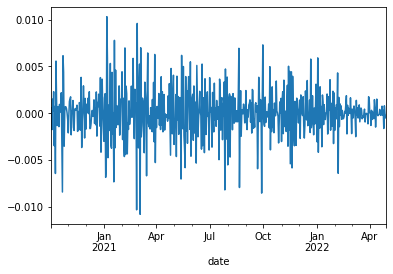

In [67]:
# Use the `plot` function to plot the daily portfolio returns
portfolio_returns.plot()

In [68]:
# Use the `cumprod` function to cumulatively multiply each element in the Series by it's preceding element until the end
cumulative_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_returns.head()

date
2020-10-03    0.000554
2020-10-04   -0.001215
2020-10-05    0.000279
2020-10-06    0.000499
2020-10-07    0.002788
Freq: D, dtype: float64

<AxesSubplot:xlabel='date'>

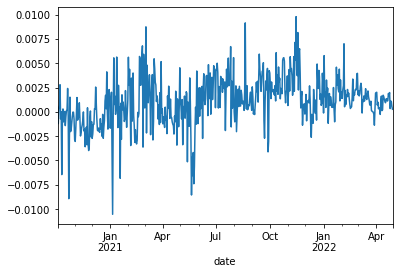

In [69]:
# Use the `plot` function to plot the cumulative portfolio returns
cumulative_returns.plot()

In [70]:
# After setting the `Date` as the index, loc can be used to specify a range of dates
six_month_filtered_df = top_5_stable_coins.loc['2021-01-03':'2021-06-03', :]
six_month_filtered_df

,tether,usd-coin,terrausd,binance-usd,dai
,closing_price,closing_price,closing_price,closing_price,closing_price
date,,,,,
2021-01-03,1.003121,1.002601,1.005249,1.002725,1.005493
2021-01-04,1.000721,0.996564,0.980931,0.998637,1.007851
2021-01-05,0.999706,0.980894,0.993172,0.980239,1.002005
2021-01-06,1.002747,0.999967,1.004069,0.999434,1.000494
2021-01-07,1.007832,1.000258,1.018777,1.003331,1.006038
...,...,...,...,...,...
2021-05-30,0.999162,0.996284,1.002001,1.001145,0.999336
2021-05-31,0.998049,1.000435,0.995101,0.998927,1.001422


In [71]:
# Use the `pct_change` function to calculate the daily returns over the date range of closing BAC prices
six_month_daily_returns = six_month_filtered_df.pct_change()
six_month_daily_returns

,tether,usd-coin,terrausd,binance-usd,dai
,closing_price,closing_price,closing_price,closing_price,closing_price
date,,,,,
2021-01-03,NaN,NaN,NaN,NaN,NaN
2021-01-04,-0.002392,-0.006022,-0.024192,-0.004076,0.002346
2021-01-05,-0.001014,-0.015724,0.012479,-0.018423,-0.005801
2021-01-06,0.003042,0.019444,0.010972,0.019582,-0.001508
2021-01-07,0.005070,0.000290,0.014649,0.003899,0.005541
...,...,...,...,...,...
2021-05-30,-0.001468,-0.009314,-0.000737,-0.004903,-0.006613
2021-05-31,-0.001114,0.004166,-0.006887,-0.002215,0.002087


<AxesSubplot:xlabel='date'>

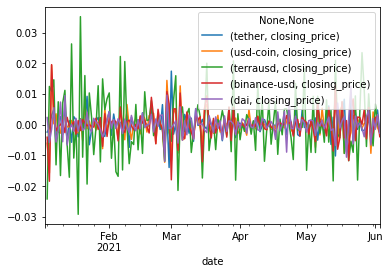

In [72]:
# Use the `plot` function to visualize the daily returns over the 6 month period for BAC
six_month_daily_returns.plot()

In [45]:
ape = crypto('apecoin', 'usd')
ape.head()

,apecoin
,closing_price
date,
2022-03-17,8.536839
2022-03-18,8.536839
2022-03-19,12.988729
2022-03-20,11.535165
2022-03-21,9.618214


In [46]:
sand = crypto('the-sandbox', 'usd')
sand.head()

,the-sandbox
,closing_price
date,
2020-08-14,0.080920
2020-08-15,0.066403
2020-08-16,0.050784
2020-08-17,0.061080
2020-08-18,0.054974


In [47]:
axie = crypto('axie-infinity', 'usd')
axie.head()

,axie-infinity
,closing_price
date,
2020-11-04,0.145700
2020-11-05,0.145700
2020-11-06,0.134893
2020-11-07,0.142960
2020-11-08,0.141995


In [48]:
tt = crypto('theta-token', 'usd')
tt.head()

,theta-token
,closing_price
date,
2018-01-24,0.216887
2018-01-25,0.293969
2018-01-26,0.295698
2018-01-27,0.261279
2018-01-28,0.295670


In [49]:
dl = crypto('decentraland', 'usd')
dl.head()

,decentraland
,closing_price
date,
2017-10-28,0.010094
2017-10-29,0.010124
2017-10-30,0.009775
2017-10-31,0.009237
2017-11-01,0.010004


In [60]:
top_5_NFTs = pd.concat([ape, sand, axie, tt, dl], axis='columns', join='inner')
top_5_NFTs

,apecoin,the-sandbox,axie-infinity,theta-token,decentraland
,closing_price,closing_price,closing_price,closing_price,closing_price
date,,,,,
2022-03-17,8.536839,3.241376,50.465033,2.901662,2.495892
2022-03-18,8.536839,3.224115,50.432389,2.856017,2.446062
2022-03-19,12.988729,3.212858,50.588399,2.924731,2.452214
2022-03-20,11.535165,3.231927,52.112462,2.975521,2.508698
2022-03-21,9.618214,3.092472,49.810170,2.882207,2.401157
2022-03-22,10.483838,3.082107,50.392867,2.930969,2.408099
2022-03-23,12.266127,3.118412,52.381958,3.075463,2.437020
2022-03-24,13.286063,3.304216,57.865820,3.187094,2.543958
